# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ilma Navila
- **Email:** m303b4kx1950@bangkit.academy
- **ID Dicoding:** m303b4kx1950

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana distribusi perbulanannya?
- Pertanyaan 2: Bagaimana distribusi pertahunnya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [7]:
day_df = pd.read_csv("dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
Data pertama yang dimuat ialah data dari tabel day. Menampilkan 5 baris pertama dari DataFrame day_df.

In [8]:
hour_df = pd.read_csv("dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Menilai data day_df**

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [15]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [16]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [17]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Menilai data hour_df**

In [18]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [22]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [23]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [24]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Menilai day_df
- Menilai hour_df

### Cleaning Data

**Membersihkan Data day_df**

In [25]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

**Insight:** Kode di atas akan mengubah tipe data object menjadi datetime. Untuk memastikan hal ini berjalan sesuai harapan, periksa kembali tipe data tersebut menggunakan method info().

In [27]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Membersihkan Data hour_df**

In [28]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [29]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Menggabungkan day_df dan hour_df

In [31]:
merged_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",  # Pilih tipe join yang sesuai
    on="dteday"  # Menggabungkan berdasarkan kolom 'dteday'
)

# Menampilkan hasil penggabungan
merged_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [54]:
all_df = merged_df

### Explore day_df

In [55]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [56]:
unique_casual_per_weekday = day_df.groupby(by="weekday").casual.nunique().sort_values(ascending=False)
print(unique_casual_per_weekday)

weekday
0    104
6    103
3    101
2     99
4     99
5     99
1     98
Name: casual, dtype: int64


In [57]:
unique_casual_per_month = day_df.groupby(by="mnth").casual.nunique().sort_values(ascending=False)
print(unique_casual_per_month)

mnth
5     62
10    62
7     61
3     60
4     60
12    60
9     59
8     58
1     57
11    57
6     56
2     52
Name: casual, dtype: int64


In [58]:
unique_users_per_weather = hour_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False)
print(unique_users_per_weather)

weathersit
1    848
2    649
3    368
4      3
Name: cnt, dtype: int64


### Explore hour_df

In [59]:
unique_users_per_hour = hour_df.groupby(by="hr").cnt.nunique().sort_values(ascending=False)
print(unique_users_per_hour)

hr
17    494
18    471
8     467
19    423
16    414
14    385
12    383
15    383
13    377
7     374
20    360
11    337
9     322
10    312
21    294
22    252
23    196
6     187
0     162
1     120
2     100
3      60
5      58
4      25
Name: cnt, dtype: int64


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana cuaca memengaruhi jumlah pengguna sepeda?

In [60]:
weather_df = day_df.groupby(by="weathersit").cnt.sum().reset_index()
weather_df.rename(columns={
    "cnt": "total_users"
}, inplace=True)
weather_df

,weathersit,total_users
0,1,2257952
1,2,996858
2,3,37869


In [61]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


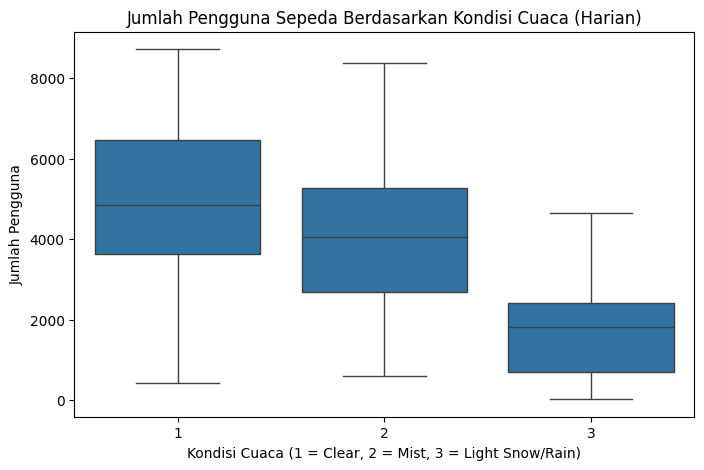

In [62]:
plt.figure(figsize=(8,5))
sns.boxplot(x='weathersit', y='cnt', data=day_df)
plt.title('Jumlah Pengguna Sepeda Berdasarkan Kondisi Cuaca (Harian)')
plt.xlabel('Kondisi Cuaca (1 = Clear, 2 = Mist, 3 = Light Snow/Rain)')
plt.ylabel('Jumlah Pengguna')
plt.show()

### Pertanyaan 2: Bagaimana jumlah penggunaan sepeda per bulan

In [63]:
monthly_usage_df = day_df.groupby('mnth')['cnt'].sum().reset_index()
monthly_usage_df.rename(columns={'cnt': 'total_users'}, inplace=True)
monthly_usage_df

,mnth,total_users
0,1,134933
1,2,151352
2,3,228920
3,4,269094
4,5,331686
5,6,346342
6,7,344948
7,8,351194
8,9,345991
9,10,322352


In [64]:
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


C:\Users\HP\AppData\Local\Temp\ipykernel_17016\4183341792.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='mnth', y='cnt', data=day_df, ci=None)


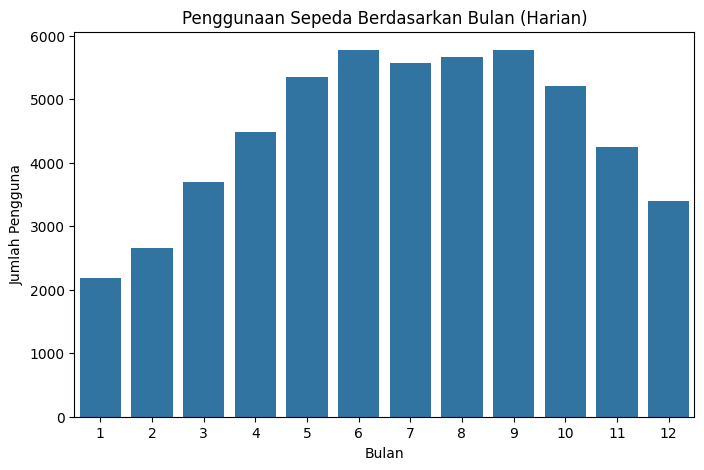

In [65]:
plt.figure(figsize=(8,5))
sns.barplot(x='mnth', y='cnt', data=day_df, ci=None)
plt.title('Penggunaan Sepeda Berdasarkan Bulan (Harian)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna')
plt.show()

**Insight:**
- Cuaca memengaruhi jumlah pengguna sepeda, pengguna sepeda paling banyak di cuaca clear(cerah) dan paling sedikit pada cuaca rain(hujan)
- Jumlah penggunaan sepeda per bulan awal bulan naik hingga dipertengahan stabil dan akan turun pada akhir tahun 

## Conclusion

- Conclution pertanyaan 1: Cuaca memengaruhi jumlah pengguna sepeda, pengguna sepeda paling banyak di cuaca clear(cerah) dan paling sedikit pada cuaca rain(hujan)
- Conclution pertanyaan 2: Jumlah penggunaan sepeda per bulan awal bulan naik hingga dipertengahan stabil dan akan turun pada akhir tahun

In [66]:
all_df.to_csv("all_data.csv", index=False)